In [1]:
import sys
sys.path.append('../src')
from matplotlib import pyplot as plt
%matplotlib inline
# import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
from gait.utils import get_overlap_data_all_sessions,  split_test_train_by_subjects, get_overlap_data_all_sessions
from gait.training import train_cnn_model_simple
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

In [31]:
OVERLAP_PERCENT = 0
# exclude_subjects = ['ddAeJA42PXvwthbW', 'nan',
#                     'MMuX9YIh4NTbLZLM',
#                     'NKdnm6cN3KKAx7R4',
#                     'PE8D53oX060qLbdX',
#                     'xYdtS1F8tDyjEIgN',
#                     'EUbKPOSQgjccjtvi',
#                     'PE8D53oX060qLbdX',
#                     'ddAeJA42PXvwthbW',
#                     'LLZjAPTyj7muHsEf',
#                     'cbOZWnI7s1y8oLD4',
#                     'ddAeJA42PXvwthbW',
#                     '1ZstYhEKzKKfGnMW',
#                     'LLZjAPTyj7muHsEf',
#                     'bQsRwKxgJiXTzo6P',
#                     'sUZBISq61Y7I5tqQ',
#                     '19AoxD1bgrDckd2p',
#                     'wtyNo4LYaWXrkzA7',
#                     ]

exclude_subjects = ['ddAeJA42PXvwthbW', 'nan',
                     'sUZBISq61Y7I5tqQ',
                     'LLZjAPTyj7muHsEf',
                     'cbOZWnI7s1y8oLD4',
                     'EUbKPOSQgjccjtvi',
                     'MMuX9YIh4NTbLZLM',
                     'PE8D53oX060qLbdX',
                     'xYdtS1F8tDyjEIgN',
                     '19AoxD1bgrDckd2p',
                     'wtyNo4LYaWXrkzA7', ]


In [32]:
X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
# REMOVE UNWANTED SUBJECTS
indexes = np.where(subjects == exclude_subjects)
X = np.delete(X, indexes[0], axis=0)
y = np.delete(y, indexes[0], axis=0)
subjects = np.delete(subjects, indexes[0], axis=0)
# END REMOVE UNWANTED SUBJECTS

                     0
0                     
KPJOUYXzpivbLfsH  1881
WAb2Ztvv2ux95P4Q  1860
qyP4saGxcV9UfeQI  1832
csujYZktn88ftTTv  1358
0UXFxu10k0En1vDK  1332
zOmNofnVfbR21Y7n   901
QFxq3HxMCbzs6bCt   866
c9EB3mOQckRCc8Bz   831
LdH95bTaViXIdDBZ   517
psiuhPJmLIa2wC4u   508
bQsRwKxgJiXTzo6P   465
YbJVcb4vFFjKKlfe   452
1ZstYhEKzKKfGnMW   435
AlOXZjo87HHkXeaa   433
NKdnm6cN3KKAx7R4   431
KNmC3LADpLyH5qJA   430
0DXZFsYOfgqsYe0Z   389
kPNKVxgIznp3Vskg   371
eqUcL0HkHZfDt0Xs   366
I1TuySg6fbJ0xeXt   349
ewpnQDEzR8hTqPRY   249


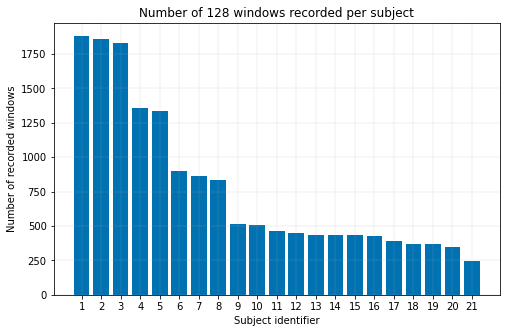

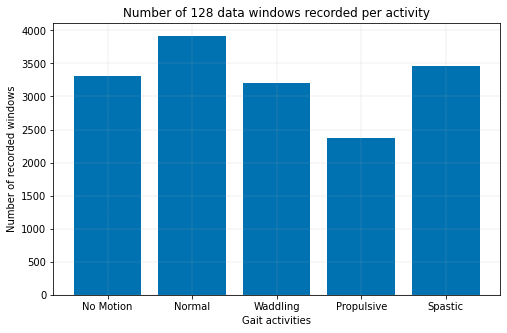

In [37]:
# plt.style.use('seaborn-white')

# sns.set_theme(style="whitegrid", palette="pastel")
# sns.set_theme(style="white", palette=None)
# sns.set()

plt.figure(figsize=(8, 5))
plt.style.use('seaborn-colorblind')
subject_df = pd.DataFrame(subjects)
print(pd.DataFrame(subject_df.value_counts()))
subject_value_counts = pd.DataFrame(
    subject_df.value_counts()).to_numpy().flatten()

subject_len = len(subject_value_counts)
subject_ids = [ '{}'.format(x+1)  for x in range(subject_len)]
# subjects = subject_value_counts[0]
plt.grid(linestyle='--', linewidth=0.25)
plt.bar(subject_ids, subject_value_counts, width=0.8, align='center')
plt.title('Number of 128 windows recorded per subject')
plt.ylabel('Number of recorded windows')
plt.xlabel('Subject identifier')
plt.show()

plt.figure(figsize=(8, 5))
activity_df = pd.DataFrame(y)
activities = ['No Motion', 'Normal', 'Waddling', 'Propulsive', 'Spastic']
activity_value_count = pd.DataFrame(
    activity_df.value_counts()).sort_index().to_numpy().flatten()
plt.grid(linestyle='--', linewidth=0.25)
plt.bar(activities, activity_value_count, width=0.8, align='center')
plt.title('Number of 128 data windows recorded per activity')
plt.ylabel('Number of recorded windows')
plt.xlabel('Gait activities')
# .plot(kind="bar", title="Training Examples by Activity")
plt.show()


In [6]:
def data_for_subject(X, y, unique_subjects, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(unique_subjects)) if unique_subjects[i]==sub_id]
    # return the selected samples
    X_by_subject = X[ix, :,:]
    print(X_by_subject.shape)
    return X[ix, :, :], y[ix]

def data_for_activity(X, y, activity_id):
    ix = [i for i in range(len(y)) if y[i] == activity_id]
    
    return X[ix,:, :]

In [7]:
NO_MOTION = '1'
NORMAL_GAIT = '2'
WADDLING_GAIT = '3'
PROPULSIVE_GAIT = '4'
SPASTIC_GAIT = '5'

In [8]:
unique_subjects = np.unique(subjects)
choosen_subject = unique_subjects[0]
X_by_subject, y_by_subject = data_for_subject(X, y, subjects, choosen_subject)
no_motion_data = data_for_activity(X_by_subject, y_by_subject, NO_MOTION)
normal_gait_data = data_for_activity(X_by_subject, y_by_subject, NORMAL_GAIT)
waddling_gait_data = data_for_activity(X_by_subject, y_by_subject, WADDLING_GAIT)
propulsive_gait_data = data_for_activity(X_by_subject, y_by_subject, PROPULSIVE_GAIT)
spastic_gait_data = data_for_activity(X_by_subject, y_by_subject, SPASTIC_GAIT)

(389, 128, 9)


In [9]:
def get_x_plot_values(X):
    return np.array(X.flatten())

In [10]:
def get_data_section_idx(X):
    N, W_len, channel = X.shape
    midIdx = int(N / 4)
    minIdx = midIdx - 3
    maxIdx = midIdx + 3
    return X[minIdx: maxIdx, :, :]


In [11]:
get_data_section_idx(X)

array([[[-0.067688, -0.071533,  0.491211, ...,  0.135145, -1.332076,
         -0.145585],
        [-0.067688, -0.071533,  0.491211, ...,  0.135145, -1.332076,
         -0.145585],
        [-0.067688, -0.071533,  0.491211, ...,  0.135145, -1.332076,
         -0.145585],
        ...,
        [-0.040161,  0.109802,  0.461914, ...,  0.084736, -2.261703,
          0.233807],
        [-0.040161,  0.109802,  0.461914, ...,  0.084736, -2.261703,
          0.233807],
        [-0.040161,  0.109802,  0.461914, ...,  0.084736, -2.261703,
          0.233807]],

       [[-0.040161,  0.109802,  0.461914, ...,  0.084736, -2.261703,
          0.233807],
        [-0.040161,  0.109802,  0.461914, ...,  0.084736, -2.261703,
          0.233807],
        [-0.040161,  0.109253,  0.462341, ...,  0.084543, -2.261816,
          0.232265],
        ...,
        [-0.039612,  0.109924,  0.462219, ...,  0.083287, -2.261705,
          0.233623],
        [-0.039612,  0.109924,  0.462219, ...,  0.083287, -2.261705,
   

In [12]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [14]:
sampling_freq = 103  # hz

def compute_y_vals(X):
    x_num = X.shape[0]
    y_total_time = x_num / sampling_freq
    y_vals = np.linspace(0, y_total_time, num=x_num)
    return y_vals

def plot_channel_graph_per_person(gait_data, y_labels, offsetLeft, offsetRight, titles, x_marks, colors, labels, channel_offset):
    figure, (ax1, ax2, ax3) = plt.subplots(3, 1)
    figure.set_figheight(9)
    figure.set_figwidth(10)
    figure.set_dpi(300)
    figure.tight_layout(pad=5.0)
    axes = [ax1, ax2, ax3]

    for i in range(3):
        data = get_data_section_idx(gait_data)
        valueX1 = data[:, :, i + channel_offset]
        resultant = valueX1
        x_plot_values = get_x_plot_values(resultant)

        ax = axes[i]
        x_plot_vals = x_plot_values[offsetLeft:offsetRight]
        y_vals = compute_y_vals(x_plot_vals)
        ax.plot(y_vals, x_plot_vals, label=labels[i], color=colors[i])
        ax.grid(linestyle='--', linewidth=0.25)

        ax.legend(loc=4, prop={'size': 10})
        ax.set_xlabel('Time in seconds (s)')
        ax.set_ylabel(y_labels[i])
        ax.set_title(titles[i])
        for i, x_mark in enumerate(x_marks):
            ax.axvline(x=x_mark, ymin=0, ymax=1, color="grey", linestyle="-.")
    # x_labels = [((0.8, 0.4), "One gait cycle")]

    # for x_label in x_labels:
    #     ax.text(x_label[0][0], x_label[0][1], x_label[1], fontsize=8 )
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Tahoma


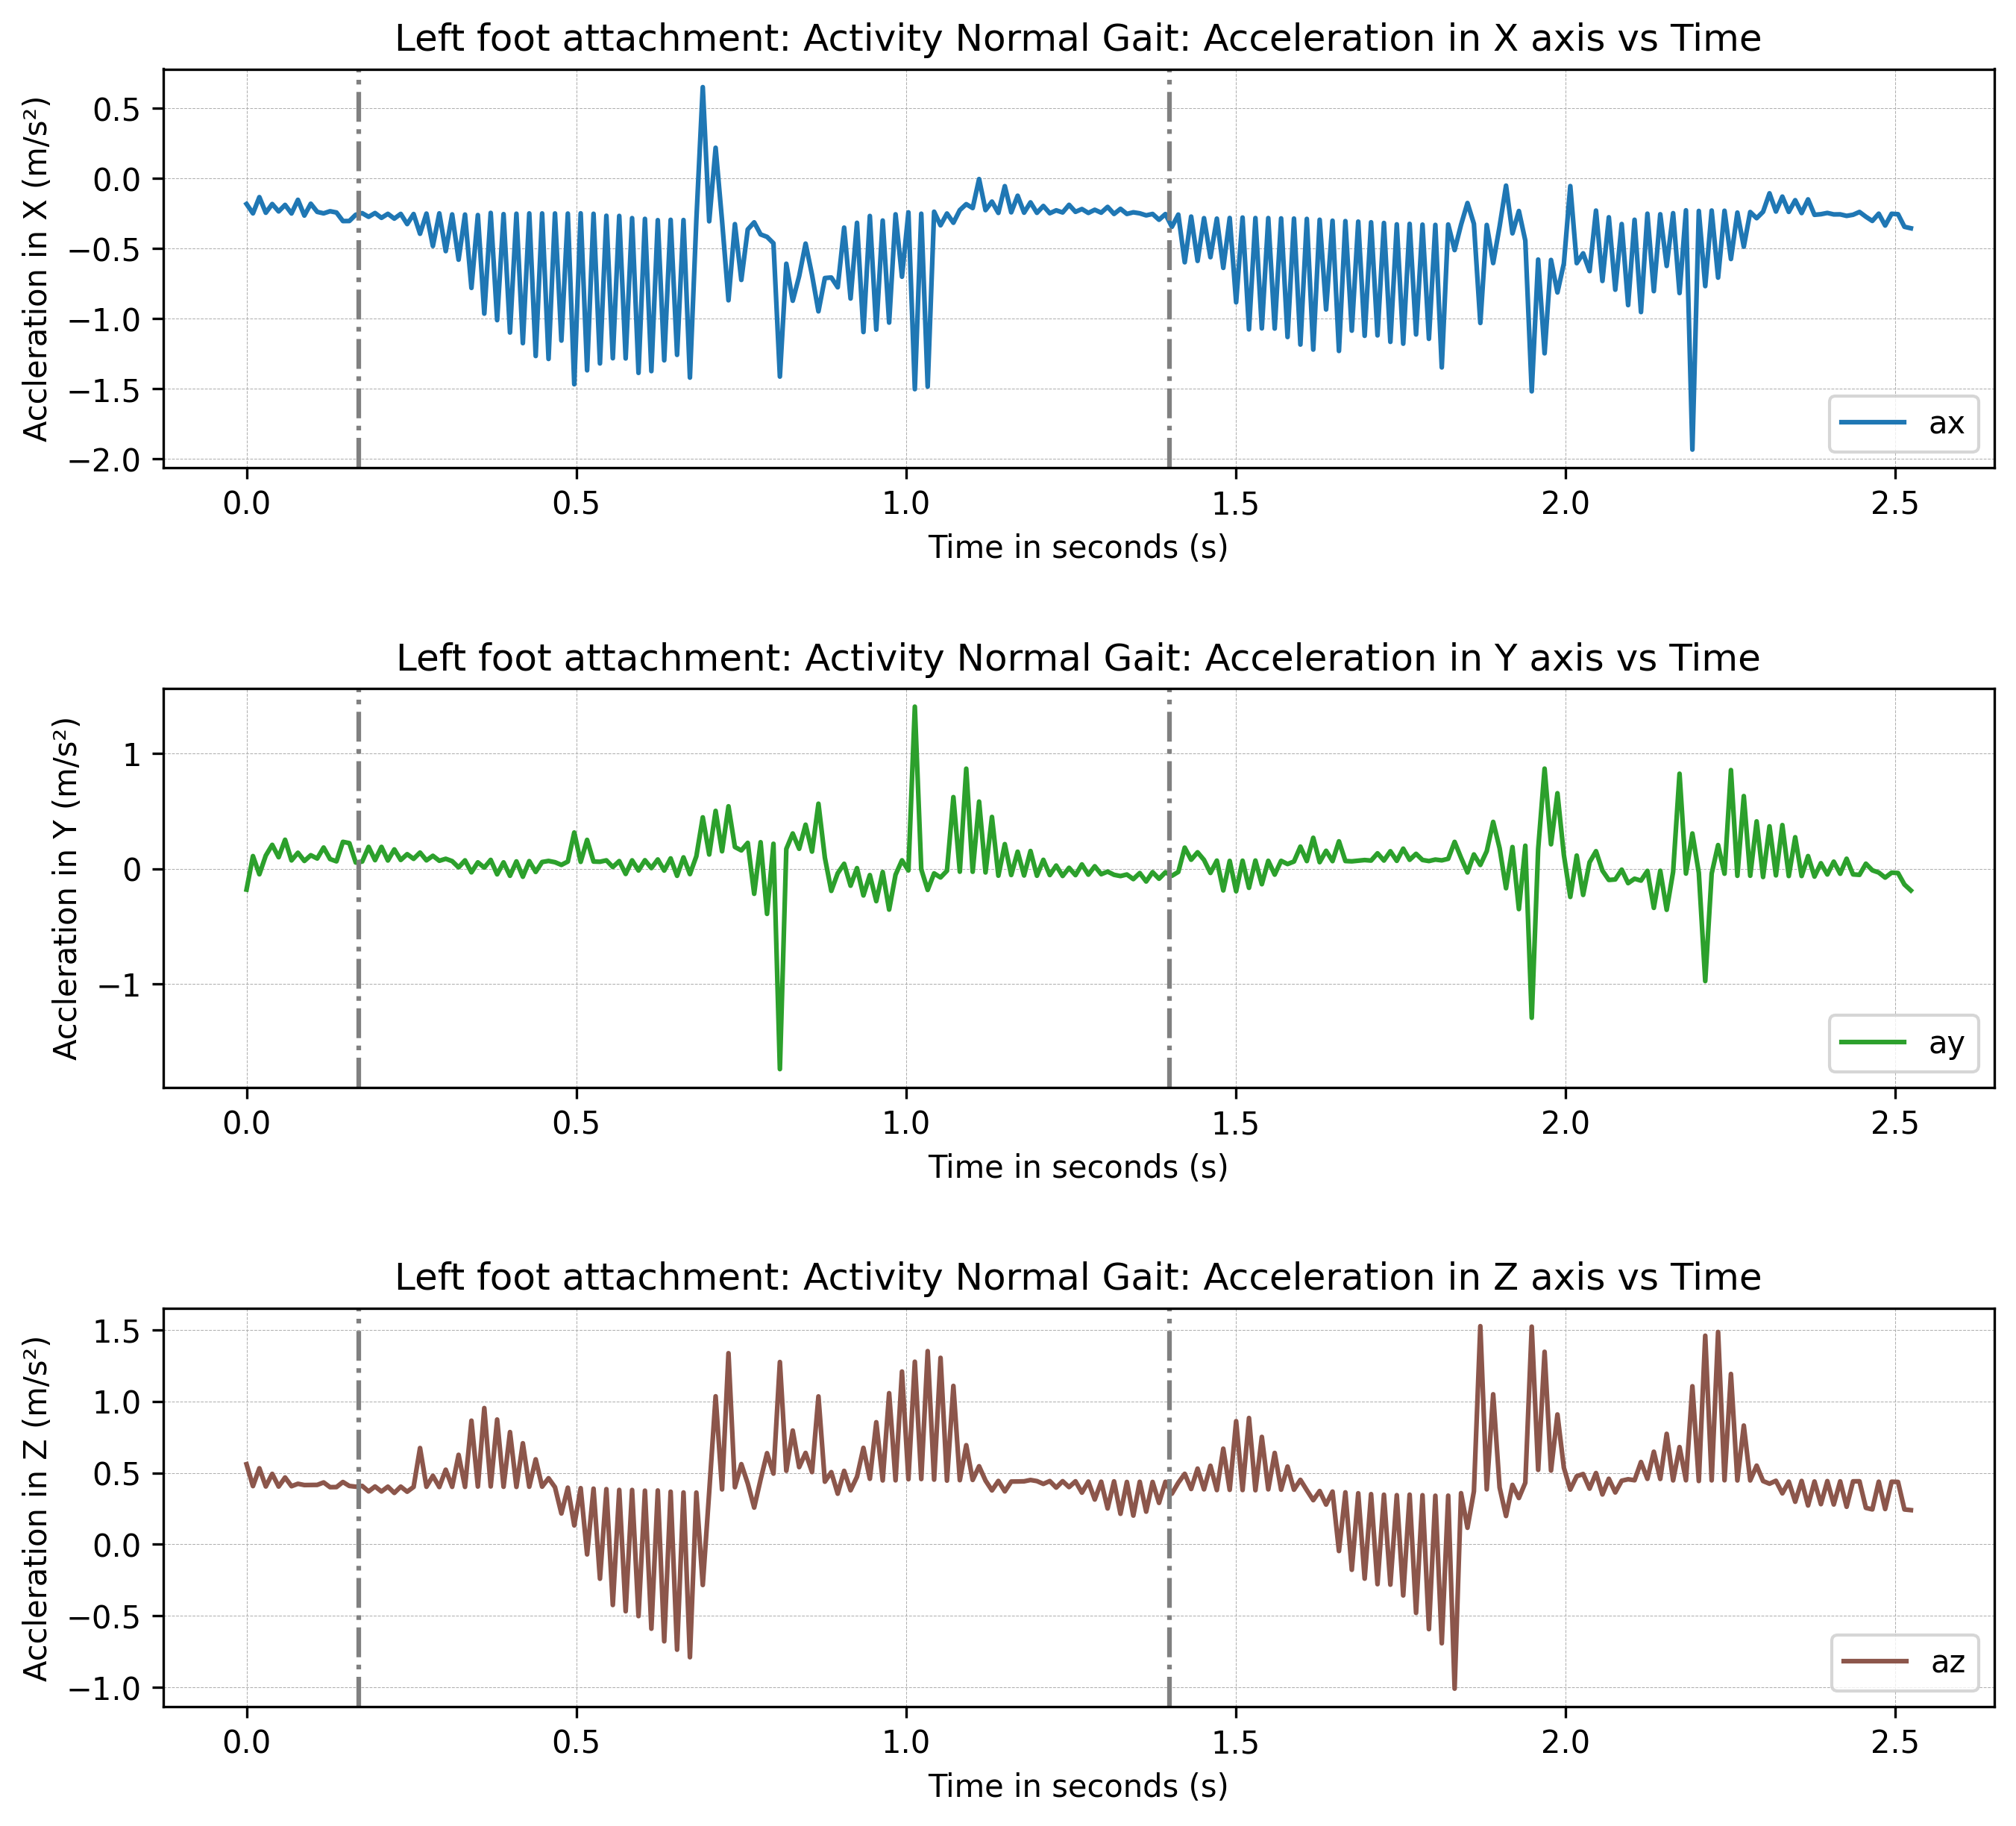

In [15]:
x_marks = [0.17, 1.4]
offsetLeft = 110
offsetRight = 370
colors = ['tab:blue', 'tab:green', 'tab:brown']
#--------------------- changing
labels = ['ax', 'ay', 'az']
y_labels = ['X', 'Y', 'Z']
y_axes_labels = ['Accleration in {} (m/s\u00b2)'.format(v) for v in y_labels]
titles = ["Left foot attachment: Activity Normal Gait: Acceleration in {} axis vs Time".format(
    v) for v in y_labels]


plot_channel_graph_per_person(gait_data=normal_gait_data, y_labels=y_axes_labels, offsetLeft=offsetLeft,
                              offsetRight=offsetRight, titles=titles, x_marks=x_marks, colors=colors, labels=labels, channel_offset=0)


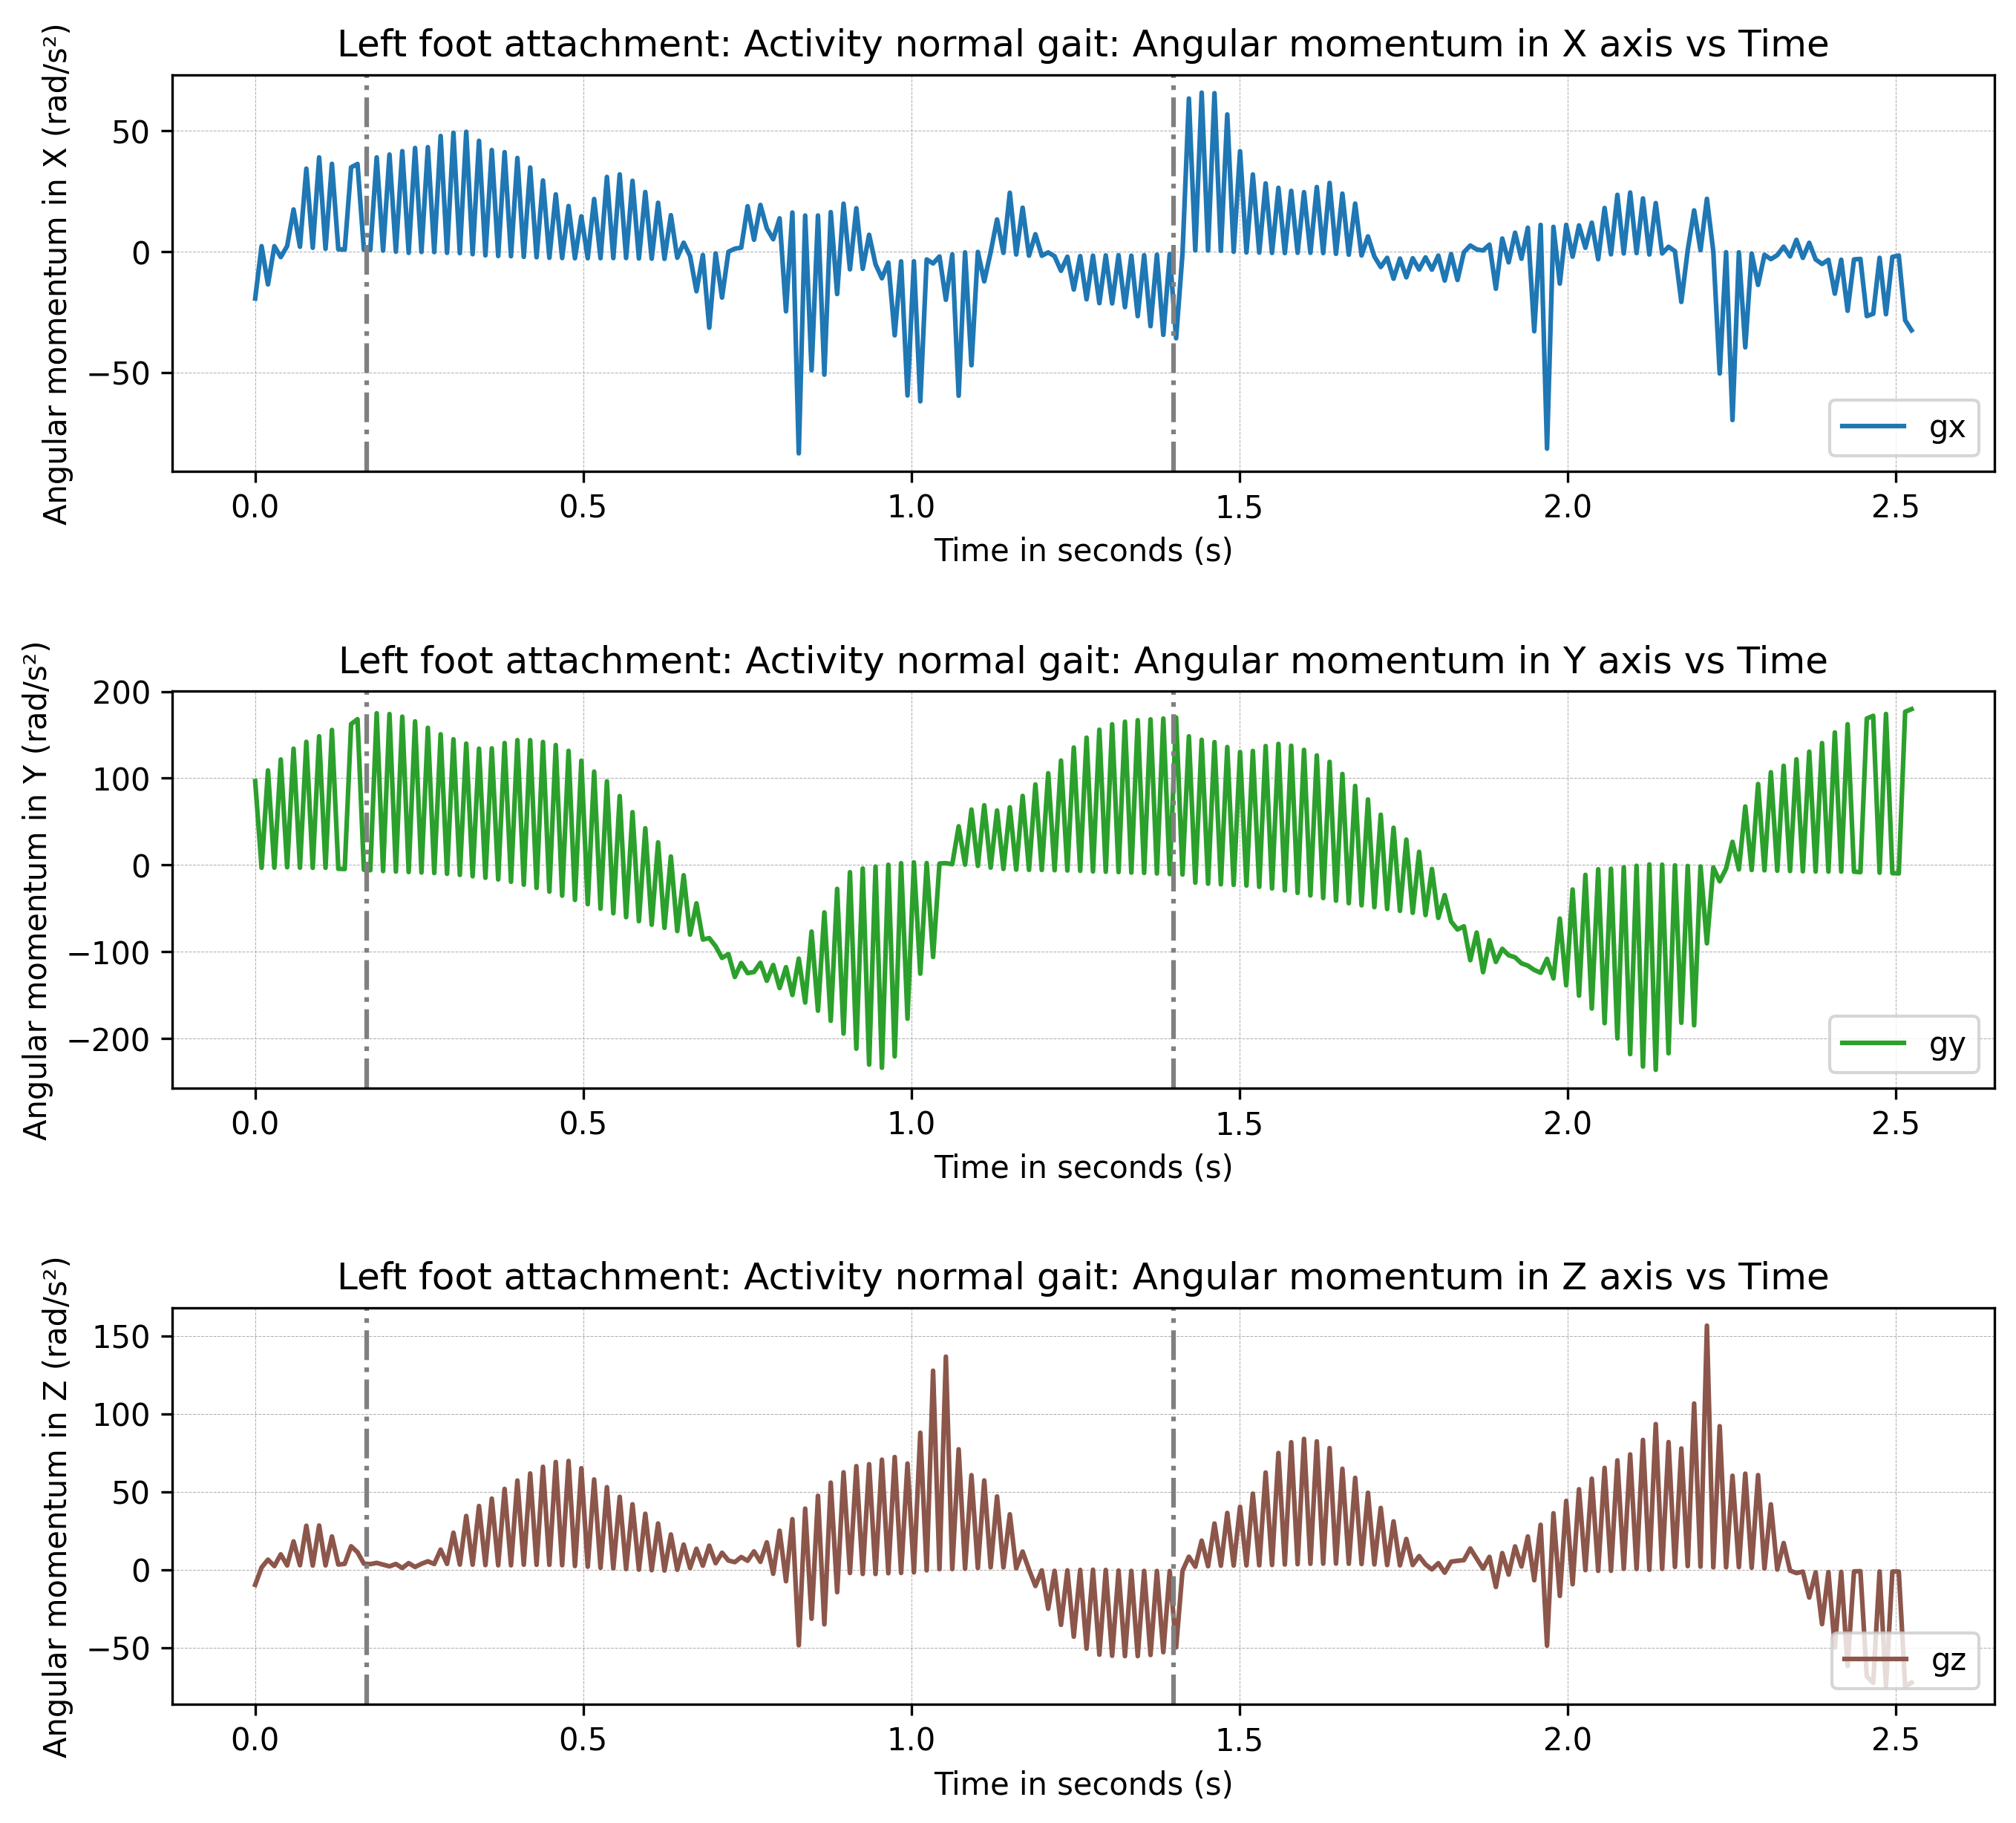

In [16]:
labels = ['gx', 'gy', 'gz']
y_labels = ['X', 'Y', 'Z']
y_axes_labels = ['Angular momentum in {} (rad/s\u00b2)'.format(v) for v in y_labels]
titles = ["Left foot attachment: Activity normal gait: Angular momentum in {} axis vs Time".format(
    v) for v in y_labels]


plot_channel_graph_per_person(gait_data=normal_gait_data, y_labels=y_axes_labels, offsetLeft=offsetLeft,
                              offsetRight=offsetRight, titles=titles, x_marks=x_marks, colors=colors, labels=labels, channel_offset=3)

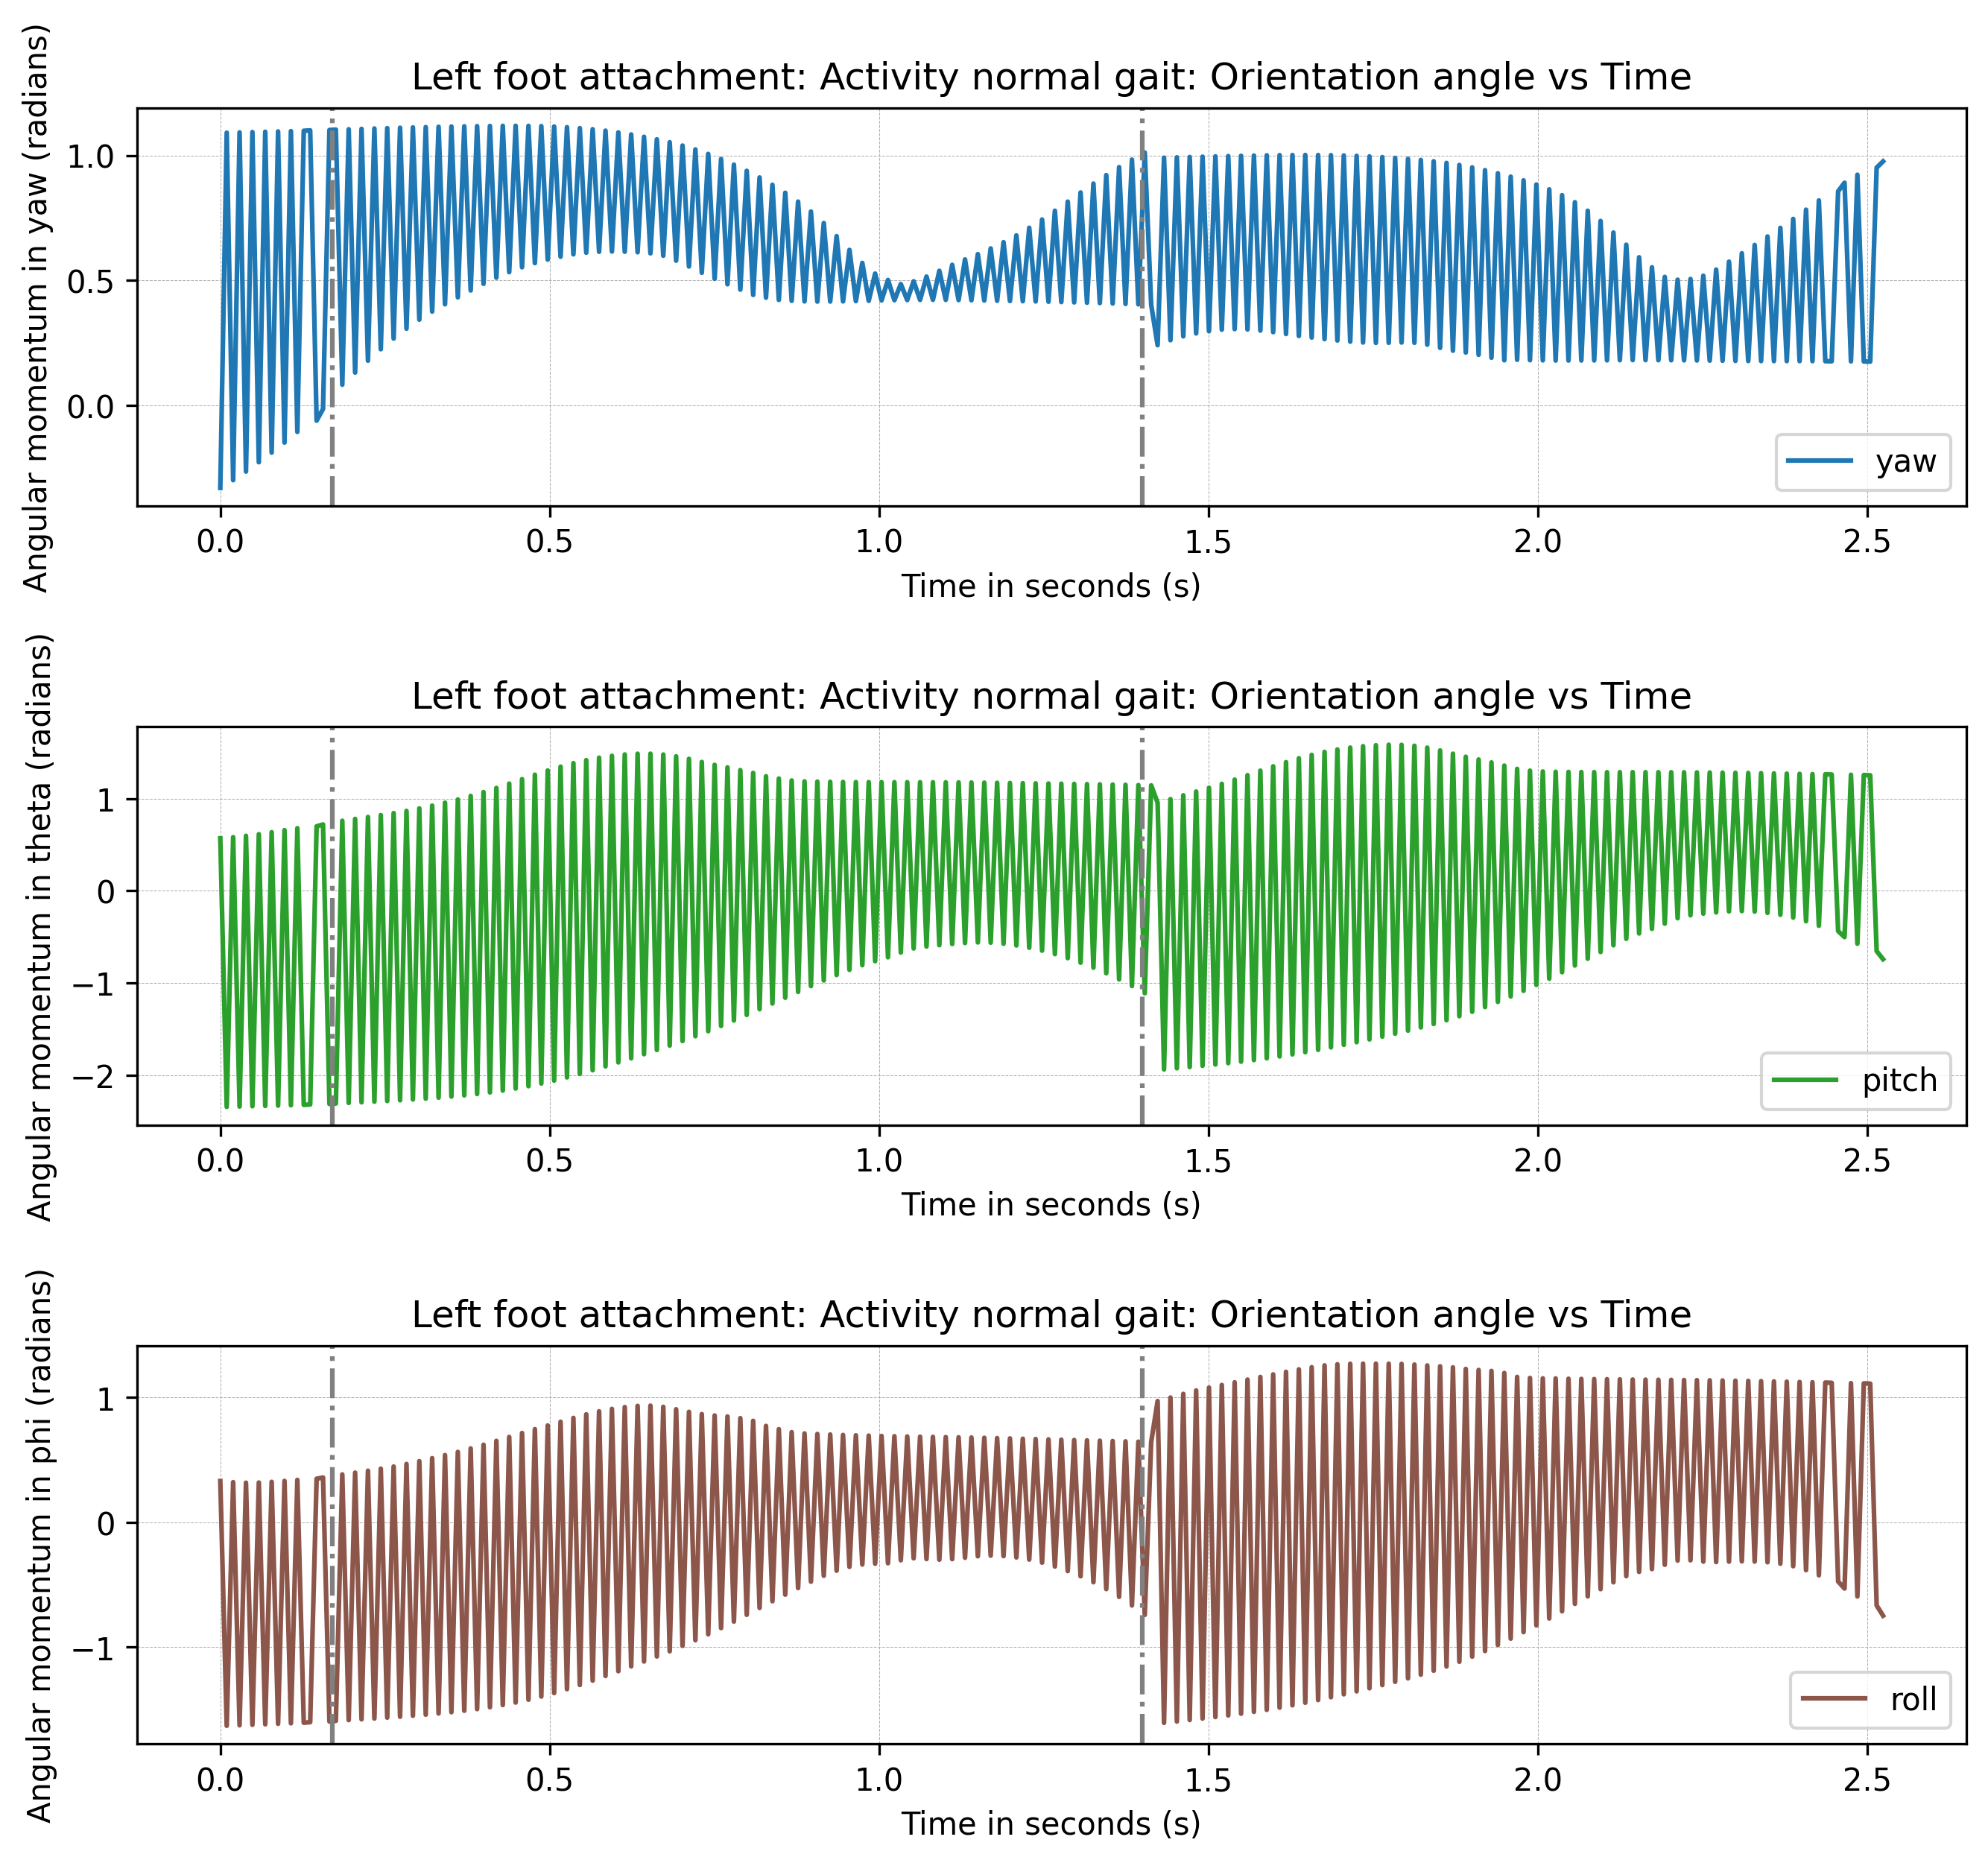

In [17]:
labels = ['yaw', 'pitch', 'roll']
y_labels = ['yaw', 'theta', 'phi']
y_axes_labels = ['Angular momentum in {} (radians)'.format(v) for v in y_labels]
titles = ["Left foot attachment: Activity normal gait: Orientation angle vs Time".format(
    v) for v in y_labels]


plot_channel_graph_per_person(gait_data=normal_gait_data, y_labels=y_axes_labels, offsetLeft=offsetLeft,
                              offsetRight=offsetRight, titles=titles, x_marks=x_marks, colors=colors, labels=labels, channel_offset=6)